Задание 1

Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными

In [2]:
x = [-1, 0, 2, 3]
y = [-2, 1, 0, -1]


def qZ(x, y):
    return (x - 3 * y - 2) / (x ** 2 + y ** 2 + 1)


def qsum(z):
    return sum(z)


def exchangeScheme(olx_x, old_y, sorted_id):
    x = y = [0 for _ in range(4)]

    x[2] = x[3] = olx_x[sorted_id[2]]

    x[0] = olx_x[sorted_id[0]]
    x[1] = olx_x[sorted_id[1]]

    y[0] = y[1] = old_y[sorted_id[2]]

    y[2] = old_y[sorted_id[0]]
    y[3] = old_y[sorted_id[1]]

    return x, y


def sorting(z):
    sorted_id = sorted(range(len(z)), key=lambda k: z[k])
    return sorted_id


def evoStep(x, y, z):
    _, min_id = min((value, id) for (id, value) in enumerate(z))
    x = x[:]
    y = y[:]
    z = z[:]

    x.pop(min_id)
    y.pop(min_id)
    z.pop(min_id)

    return x, y, z


def evoSteps(x, y, step_num=4):
    results = []
    for i in range(step_num):
        arr_z = [qZ(x, y[i]) for i, x in enumerate(x)]
        x, y, z = evoStep(x, y, arr_z)
        x, y = exchangeScheme(x, y, sorting(z))
        results.append([x, y, qsum(arr_z), arr_z])
    return x, y, results

results = evoSteps(x, y)
qualityArrZ = []
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
    qualityArrZ += results[2][i][3]
print(f'max z: {max(qualityArrZ)}')

max_1_step: -1.6363636363636362
max_2_step: -1.5555555555555556
max_3_step: 0.6666666666666666
max_4_step: 0.8888888888888888
max z: 0.5


Задание 2

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.

Лучший маршрут: [1, 5, 4, 3, 2, 6, 1]
Его длина: 128
Длины всех рассмотренных маршрутов: [148, 162, 155, 142, 128]


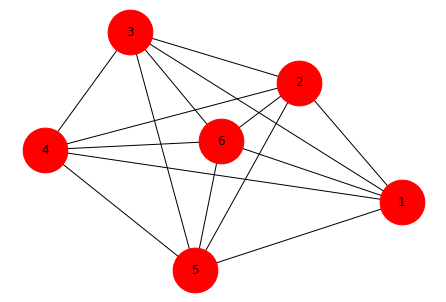

In [4]:
import networkx as nx
from math import e

distances = [
    (1, 2, 23), (1, 3, 42), (1, 4, 40), (1, 5, 25), (1, 6, 22),
    (2, 3, 20), (2, 4, 30), (2, 5, 34), (2, 6, 13), (3, 4, 22),
    (3, 5, 41), (3, 6, 21), (4, 5, 26), (4, 6, 19), (5, 6, 22)
]

V = [1, 3, 4, 5, 6, 2, 1]
P = [78, 24, 63, 17]
Z = [(4, 5), (5, 6), (2, 4), (6, 2)]
T = 100


def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prev_t):
    nextT = 0.5 * prev_t
    return nextT


graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color='red', node_size=2000, with_labels=True)


def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([item[2] if (item[0] == i and item[1] == j)
                               or (item[1] == i and item[0] == j) else -1
                    for item in distances])
    else:
        return max([item[2] if (item[0] == i and item[1] == j) else -1
                    for item in distances])


def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)


def routeOneReplacement(arr_v, z, replaceByName=True):
    decrement = 1 if replaceByName else 0

    arr_v[z[0] - decrement], arr_v[z[1] - decrement] = arr_v[z[1] - decrement], arr_v[z[0] - decrement]
    return arr_v


def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, v, z, t, p):
    sum_length = routeLength(v, distances)
    arr_sum = [sum_length]

    for i in range(len(z)):
        new_v = routeOneReplacement(v[:], z[i])
        new_s = routeLength(new_v, distances)
        arr_sum.append(new_s)
        delta_s = new_s - sum_length

        if delta_s > 0:
            _p = probability(delta_s, t)
            if _p > p[i]:
                v = new_v
                sum_length = new_s
        else:
            v = new_v
            sum_length = new_s

        t = reductTemp(t)

    return v, arr_sum


best_route, arr_length = chooseRoute(distances, V, Z, T, P)

print(f'Лучший маршрут: {best_route}')
print(f'Его длина: {routeLength(best_route, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arr_length}')